In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



In [10]:
df = pd.read_csv("/Users/emmanual/Downloads/archive-2/Unemployment in India.csv")


In [12]:
df.columns = ['Region', 'Date', 'Frequency', 'UnemploymentRate', 
              'Employed', 'LabourParticipationRate', 'Area',]

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Month'] = df['Date'].dt.month_name()

df.dropna(inplace = True)

print("Data prepared successsfully. The first 5 rows are:")
print(df.head())

Data prepared successsfully. The first 5 rows are:
           Region       Date Frequency  UnemploymentRate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly              3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly              3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly              3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly              3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly              5.17  12256762.0   

   LabourParticipationRate   Area      Month  
0                    43.24  Rural        May  
1                    42.05  Rural       June  
2                    43.50  Rural       July  
3                    43.97  Rural     August  
4                    44.68  Rural  September  


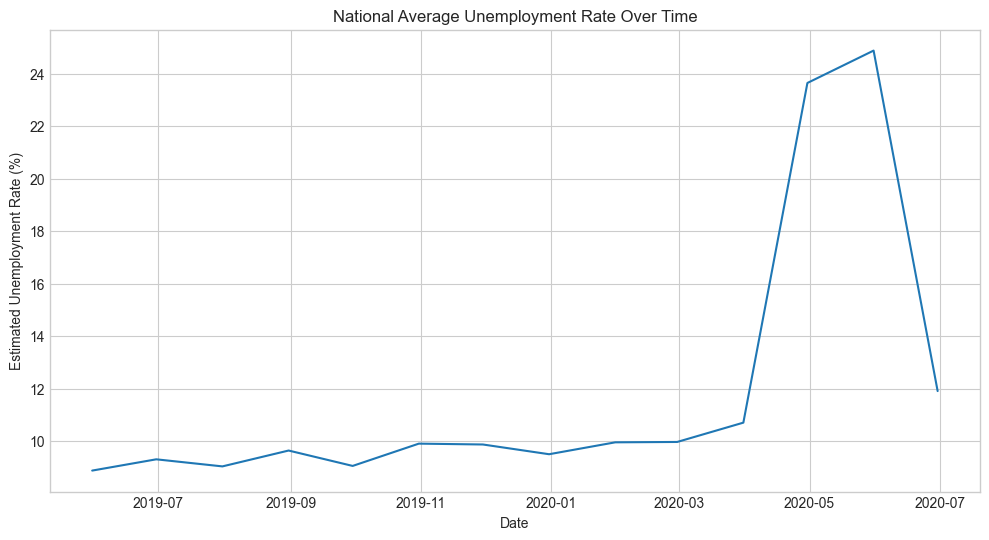

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

national_avg = df.groupby(['Date'])['UnemploymentRate'].mean().reset_index()

sns.lineplot(data=national_avg, x='Date', y='UnemploymentRate')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

Here we compare the overall unemployement rate trend and we can see that there is a clear spike in unemployement during 2020 i.e., the covid time


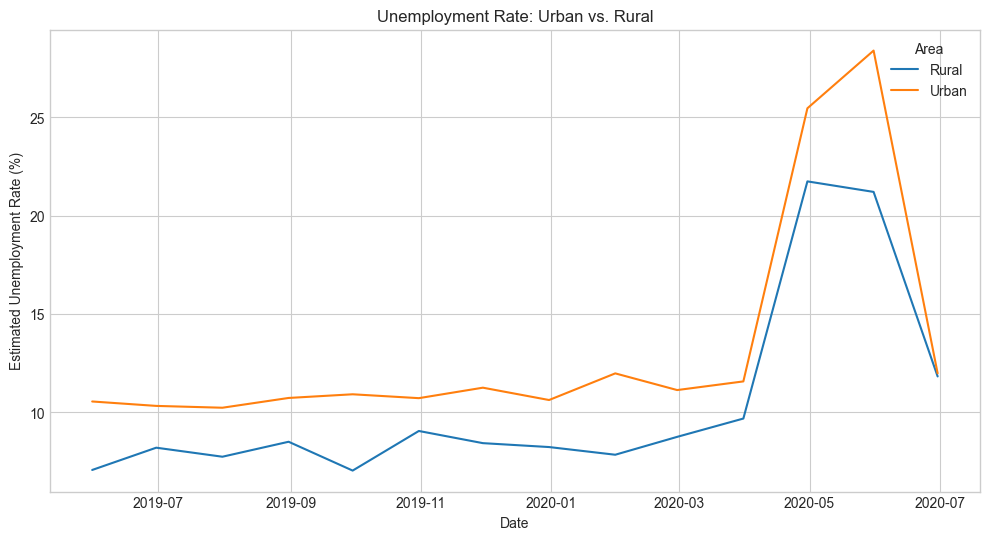

In [15]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Date', y='UnemploymentRate', hue='Area', errorbar=None)
plt.title('Unemployment Rate: Urban vs. Rural')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Area')
plt.show()


here we can see the unemplyement between urban and rural side and the rate of unemplyement is more ont he urban side 

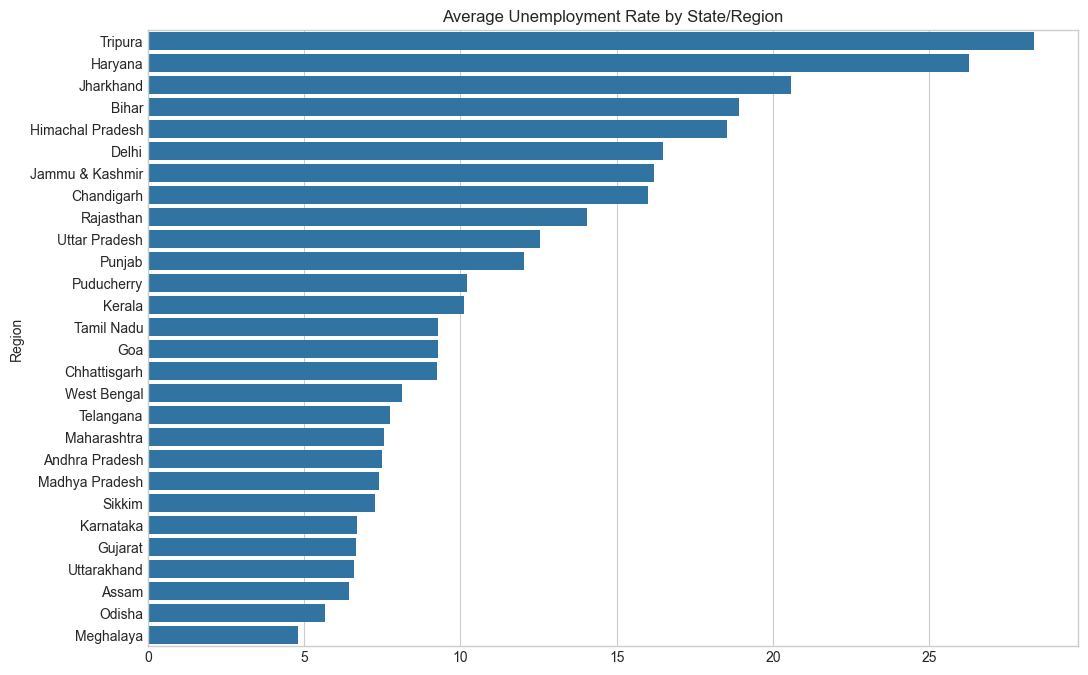

In [17]:
state_avg = df.groupby('Region')['UnemploymentRate'].mean().sort_values(ascending=False)

plt.figure(figsize = (12,8))
sns.barplot(x=state_avg.values, y = state_avg.index)
plt.title('Average Unemployment Rate by State/Region')
plt.show()

here we can see ther average unemployement rate and as we can see tripura has the highest unemployement rate and meghlaya has the lowest


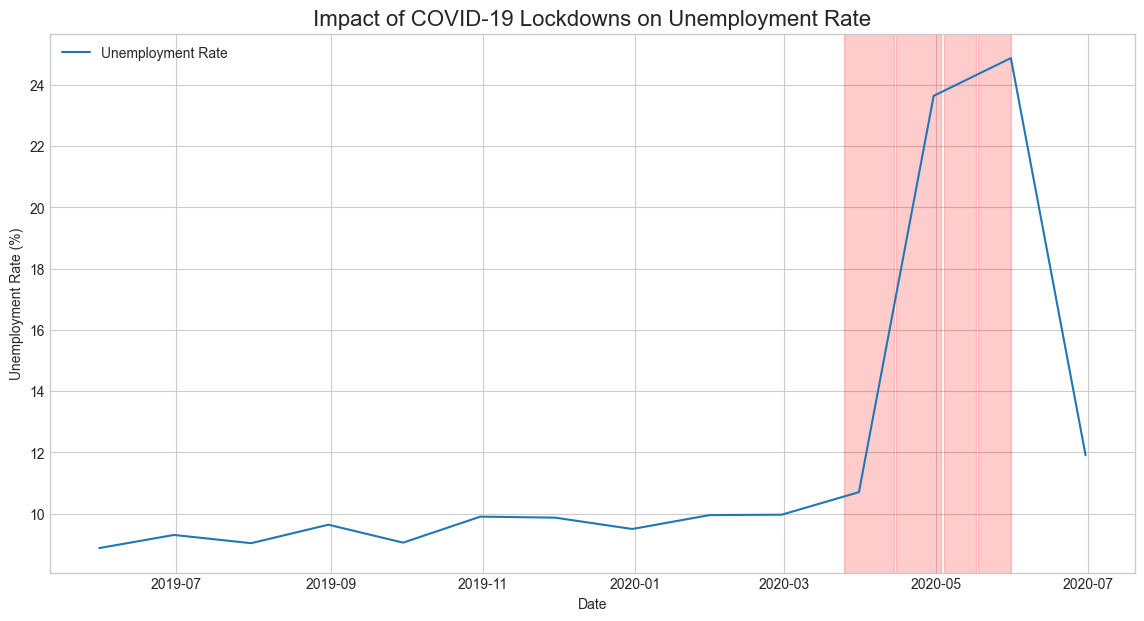

In [ ]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=national_avg, x='Date', y='UnemploymentRate', label="Unemployment Rate")


lockdowns = [
    ('2020-03-25', '2020-04-14', 'Lockdown 1.0'),
    ('2020-04-15', '2020-05-03', 'Lockdown 2.0'),
    ('2020-05-04', '2020-05-17', 'Lockdown 3.0'),
    ('2020-05-18', '2020-05-31', 'Lockdown 4.0')
]

for start, end, label in lockdowns:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.2)
    plt.text(pd.to_datetime(start), 25, label, rotation=90, fontsize=9, color='red')

plt.title('Impact of COVID-19 Lockdowns on Unemployment Rate', fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()
